## Observations and Insights 

In [102]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress, pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merged_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
mouse_merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
mouse_merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_merged_df.duplicated(subset=['Mouse ID'])


0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_merged_df.drop_duplicates(subset=['Timepoint'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [15]:
# Checking the number of mice in the clean DataFrame.
mouse_merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats=pd.DataFrame({"Mean":[mouse_merged_df['Tumor Volume (mm3)'].mean()],
                            "Variance":[mouse_merged_df['Tumor Volume (mm3)'].var()],
                            "Standar Deviation":[mouse_merged_df['Tumor Volume (mm3)'].std()],
                            "SEM":[mouse_merged_df['Tumor Volume (mm3)'].sem()]
                           })
summary_stats
#mouse_merged_df.describe()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_merged_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").mean() 
mouse_merged_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").var() 
mouse_merged_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").std() 
mouse_merged_df[['Drug Regimen','Tumor Volume (mm3)']].groupby("Drug Regimen").sem() 


,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

KeyError: 'Drug Regimen'

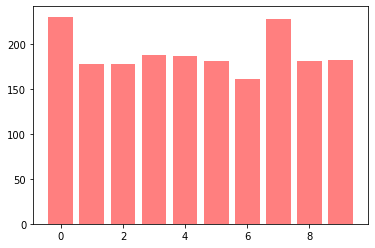

In [99]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

measurements = mouse_merged_df[['Drug Regimen','Mouse ID']].groupby("Drug Regimen").count()
measurements 

x_axis = np.arange(len(measurements))
plt.bar(x_axis,measurements["Mouse ID"], color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, measurements["Drug Regimen"])
x_axis

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_dist = mouse_merged_df.groupby("Sex").count()
sex_dist["Mouse ID"]

Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa5335372d0>,
 [Text(-0.7230187918402547, -0.8290017048509963, 'Female'),
  Text(0.723018791840255, 0.8290017048509963, 'Male')],
 [Text(-0.3943738864583208, -0.4521827481005434, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

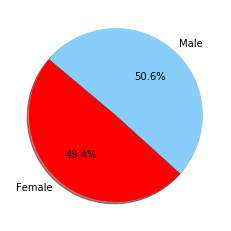

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = sex_dist.iloc[:,1]


# The colors of each section of the pie chart
colors = ["red","lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

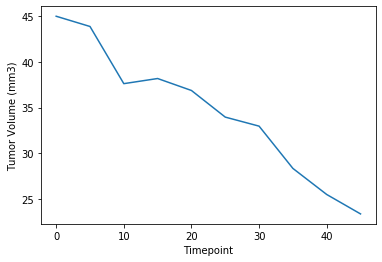

In [126]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_merged_df.loc[mouse_merged_df["Drug Regimen"]=="Capomulin"]
#selected Mouse ID s185
s185_df=capomulin_df.loc[capomulin_df["Mouse ID"]=='s185']

y_values = s185_df['Tumor Volume (mm3)']
x_values = s185_df['Timepoint']
plt.plot(x_values,y_values)
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.show()

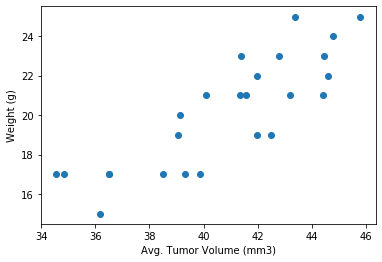

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mean_df=capomulin_df.groupby("Mouse ID").mean()
capomulin_mean_df
x_values = capomulin_mean_df['Tumor Volume (mm3)']
y_values = capomulin_mean_df['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Avg. Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

## Correlation and Regression

correlation value is: 0.8419363424694717


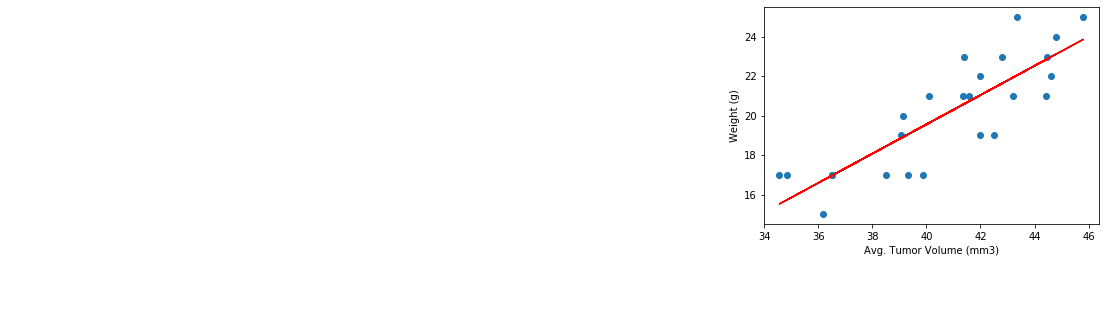

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(r,p)=pearsonr(x_values,y_values)
print(f"correlation value is: {r}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Avg. Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()

# 